In [260]:
def rotate(array, angle_in_degrees):
    import math 
    import numpy as np
    import itertools
     # get the shape of an array and save it into the h, w 
    (h,w) = array.shape[:2]
    
    # make a zero numpy as the same size of an input 'array' 
    result = np.zeros_like(array).astype(np.uint8)
    
    # change the degree into the radian 
    angle = angle_in_degrees * math.pi / 180
    
    # now compute cos and sin values  
    (cosine, sine) = np.cos(angle), np.sin(angle)
    
    rotation_matrix = [[cosine, sine], [-sine, cosine]]
    print(rotation_matrix)    
    for x,y in itertools.product(range(w), range(h)):
        pixels = array[y,x]                            # error line 
        new_x, new_y = np.matmul(rotation_matrix, [x,y])
        new_x, new_y = int(new_x), int(new_y)
        if 0 <= new_x < w and 0 <= new_y < h:
            result[new_y, new_x] = pixels            
    plt.imshow(result) 
    plt.title('Final Result')
    plt.colorbar()
    plt.show()       
            
    return result

# Analysis 

## when angle = 0 

[[1.0, 0.0], [-0.0, 1.0]]


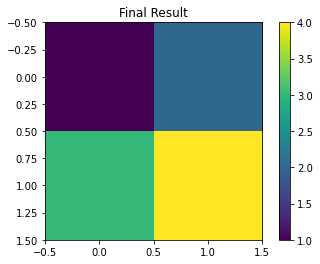

array([[1, 2],
       [3, 4]], dtype=uint8)

In [261]:
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 0)

## when angle = 360 

[[1.0, -2.4492935982947064e-16], [2.4492935982947064e-16, 1.0]]


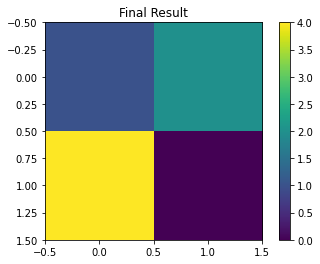

array([[1, 2],
       [4, 0]], dtype=uint8)

In [262]:
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 360)

[[6.123233995736766e-17, 1.0], [-1.0, 6.123233995736766e-17]]


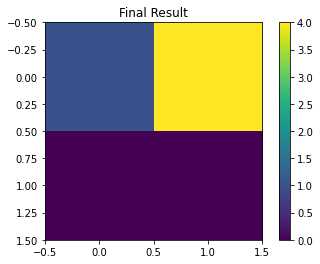

array([[1, 4],
       [0, 0]], dtype=uint8)

In [263]:
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 90)

[[-1.0, 1.2246467991473532e-16], [-1.2246467991473532e-16, -1.0]]


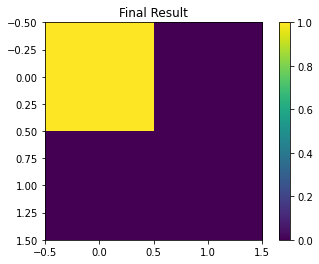

array([[1, 0],
       [0, 0]], dtype=uint8)

In [264]:
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 180)

[[-1.8369701987210297e-16, -1.0], [1.0, -1.8369701987210297e-16]]


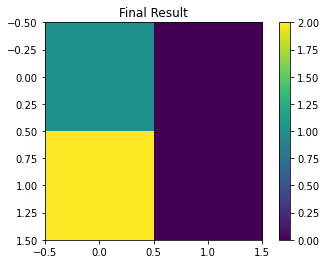

array([[1, 0],
       [2, 0]], dtype=uint8)

In [265]:
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 270)

### at angle 0 and 360 the input and matrix angle should be same. But as we can see here it is not the case 

## Answer:  I tried to print out the rotation matrix: the difference is clear here, as we can see above: 
* for 0 degree:
[[1.0, 0.0], 
[-0.0, 1.0]]

* for 360 degree: 
[[1.0, -2.4492935982947064e-16],
[2.4492935982947064e-16, 1.0]]

#### so here is the improved version 

# New version 1

In [304]:
def rotate(array, angle_in_degrees):
    import math 
    import numpy as np
    import itertools
     # get the shape of an array and save it into the h, w 
    (h,w) = array.shape[:2]
    
    # make a zero numpy as the same size of an input 'array' 
    result = np.zeros_like(array).astype(np.uint8)
    
    # change the degree into the radian 
    angle = angle_in_degrees * math.pi / 180
    
    # now compute cos and sin values  
    (cosine, sine) = np.cos(angle), np.sin(angle)
    # if the value of sine and Cosine is between -0.0001 to 0.0001 then the value of 
    if -0.0001< sine <0.0001:
        sine = 0
    elif  -0.0001< cosine <0.0001:
        cosine = 0
    
    rotation_matrix = [[cosine, sine], [-sine, cosine]]
    print(rotation_matrix)    
    for x,y in itertools.product(range(w), range(h)):
        pixels = array[y,x]                            # error line 
        new_x, new_y = np.matmul(rotation_matrix, [x,y])
        new_x, new_y = int(new_x), int(new_y)
        print(new_x, new_y)
        if 0 <= new_x < w and 0 <= new_y < h:
            result[new_y, new_x] = pixels            
    plt.imshow(result) 
    plt.title('Final Result')
    plt.colorbar()
    plt.show()       
    return result

[[1.0, 0], [0, 1.0]]
0 0
0 1
1 0
1 1


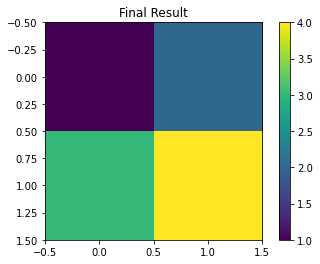

array([[1, 2],
       [3, 4]], dtype=uint8)

In [305]:
# at angle 0degree 
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 0)

[[1.0, 0], [0, 1.0]]
0 0
0 1
1 0
1 1


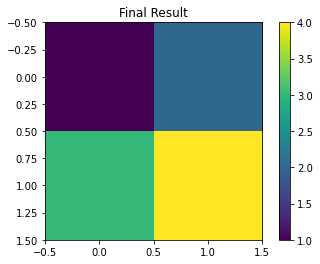

array([[1, 2],
       [3, 4]], dtype=uint8)

In [306]:
# at the angle 360 degree 
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 360)

[[0, 1.0], [-1.0, 0]]
0 0
1 0
0 -1
1 -1


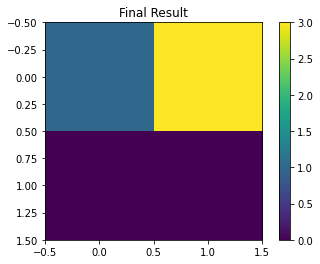

array([[1, 3],
       [0, 0]], dtype=uint8)

In [307]:
# at the angle 90 degree 
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 90)

[[-1.0, 0], [0, -1.0]]
0 0
0 -1
-1 0
-1 -1


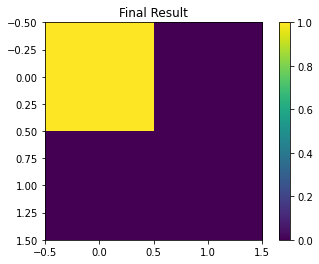

array([[1, 0],
       [0, 0]], dtype=uint8)

In [308]:
# at the angle 90 degree 
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 180)

[[0, -1.0], [1.0, 0]]
0 0
-1 0
0 1
-1 1


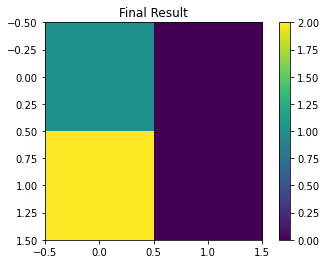

array([[1, 0],
       [2, 0]], dtype=uint8)

In [309]:
# at the angle 270 degree 
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 270)

## Analysis:
#### When printed the values of (new_x , new_y) and old values of x and y together then we came to know that:
**for 90 degree**

old x: 0 , old y: 0
new x: 0 , new y: 0

------------------------
old x: 0 , old y: 1
new x: 1 , new y: 0

------------------------
old x: 1 , old y: 0
new x: 0 , new y: -1

------------------------
old x: 1 , old y: 1
new x: 1 , new y: -1

------------------------


# Final code 

In [253]:
def rotate(array, angle_in_degrees):
    import math 
    import numpy as np
    import itertools
     # get the shape of an array and save it into the h, w 
    (h,w) = array.shape[:2]
    
    # make a zero numpy as the same size of an input 'array' 
    result = np.zeros_like(array).astype(np.uint8)
    
    # change the degree into the radian 
    angle = angle_in_degrees * math.pi / 180
    
    # now compute cos and sin values  
    (cosine, sine) = np.cos(angle), np.sin(angle)
    # if the value of sine and Cosine is between -0.0001 to 0.0001 then the value of 
    if -0.0001< sine <0.0001:
        sine = 0
    elif  -0.0001< cosine <0.0001:
        cosine = 0
    
    rotation_matrix = [[cosine, sine], [-sine, cosine]]
    #print(rotation_matrix)    
    for x,y in itertools.product(range(w), range(h)):
        pixels = array[y,x]                            # error line 
        new_x, new_y = np.matmul(rotation_matrix, [x,y])
        new_x, new_y = int(new_x), int(new_y)
        #print(new_x, new_y)
        if -w < new_x < w and -h < new_y < h:
            result[new_y, new_x] = pixels            
    plt.imshow(result) 
    plt.title('Final Result')
    plt.colorbar()
    plt.show()       
    return result

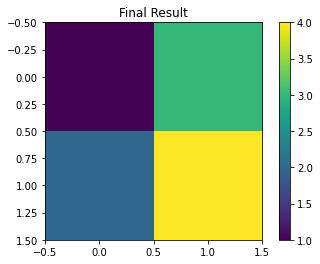

array([[1, 3],
       [2, 4]], dtype=uint8)

In [254]:
# at the angle 90 degree 
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 90)

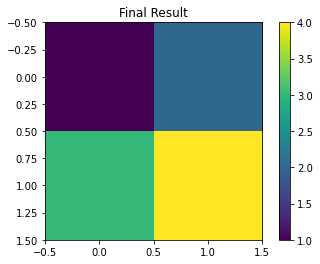

array([[1, 2],
       [3, 4]], dtype=uint8)

In [255]:
# at the angle 90 degree 
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 180)

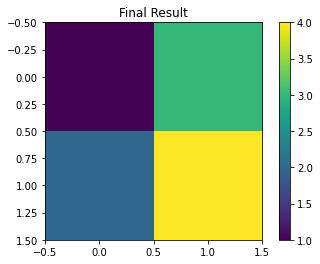

array([[1, 3],
       [2, 4]], dtype=uint8)

In [256]:
# at the angle 90 degree 
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 270)

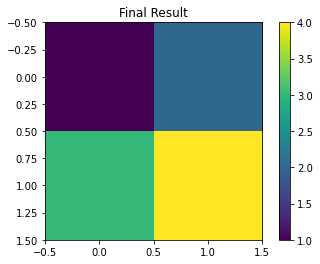

array([[1, 2],
       [3, 4]], dtype=uint8)

In [257]:
# at the angle 90 degree 
rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 360)

## As an improvement I have added the visualization feature with this function 
**There is another input 'viz' (visualization), by default it's value is 'NO'.** 

If user enters the value as 'YES', then it visualizes the steps. 

In [310]:
def rotate(array, angle_in_degrees, viz = 'NO'):
    # initialize all the libraries 
    import math 
    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    # if viz is equal to 'YES' then this function will visualize the rotation steps.   
    if viz == 'YES':
        print('input array: ', array)
        plt.imshow(array)
        plt.title('input array')
        plt.colorbar()
        plt.show()
         # get the shape of an array and save it into the h, w 
        (h,w) = array.shape[:2]
        
        # initialize zeros matrix as the same size of an input 'array'. 
        # later we will fill this matrix.   
        result = np.zeros_like(array).astype(np.uint8)

        # change the degree into the radian 
        angle = angle_in_degrees * math.pi / 180
        
        # now compute cos and sine values  
        (cosine, sine) = np.cos(angle), np.sin(angle)
        if -0.0001< sine <0.0001:
            sine = 0
        elif  -0.0001< cosine <0.0001:
            cosine = 0
        # create a rotation matrix 
        rotation_matrix = [[cosine, sine], [-sine, cosine]]
        ## plotting 
        print('Rotation matrix: ', rotation_matrix)
        plt.imshow(rotation_matrix)
        plt.title('Rotation Matrix')
        plt.colorbar()
        plt.show()
        counter = 0 # initialize a counter to count the number of time loops 
        # create a for loop: this loop will h*w times  
        for x,y in itertools.product(range(w), range(h)):
            # save the first pixel of the array (ie. [0, 0]) to pixel
            pixels = array[y,x] 
            # multiply rotation matrix with (x,y) (multiply 2*2 with 2*1, resultant will be 2*1 array)
            new_x, new_y = np.matmul(rotation_matrix, [x,y])
            # convert the values into 
            new_x, new_y = int(new_x), int(new_y)
            print('new_x, new_y: ')
            print(new_x, new_y)
            print('h:', h, 'w:', w)
            print('pixels:', pixels)
            print( '------------------------ ')
            if -w <= new_x < w and -h <= new_y < h:
                result[new_y, new_x] = pixels

            print('resultant matrix: ', result)
            plt.imshow(result)

            plt.title('Array at Step number: '+ str(counter))
            #plt.colorbar()
            plt.show()
            counter +=1
        print('Final matrix: ', result)
        plt.imshow(result) 
        plt.title('Final Result')
        plt.colorbar()
        plt.show()
    else:
        # get the shape of an array and save it into the h, w 
        (h,w) = array.shape[:2]

        # make a zero numpy as the same size of an input 'array' 
        result = np.zeros_like(array).astype(np.uint8)

        # change the degree into the radian 
        angle = angle_in_degrees * math.pi / 180

        # now compute cos and sin values  
        (cosine, sine) = np.cos(angle), np.sin(angle)

        rotation_matrix = [[cosine, -sine], [sine, cosine]]

        for x,y in itertools.product(range(w), range(h)):
            pixels = array[x,y]                          
            new_x, new_y = np.matmul(rotation_matrix, [x,y])
            new_x, new_y = int(new_x), int(new_y)
            if 0 <= new_x < w and 0 <= new_y < h:
                result[new_y, new_x] = pixels            
    
    return result
    

In [311]:

a = np.array([[1,2],[3,4]])
a.shape

(2, 2)

## Result 

input array:  [[1 2]
 [3 4]]


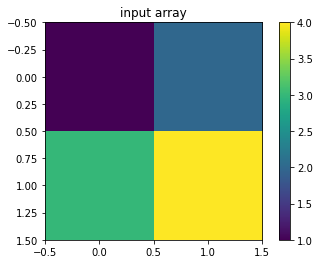

Rotation matrix:  [[0, 1.0], [-1.0, 0]]


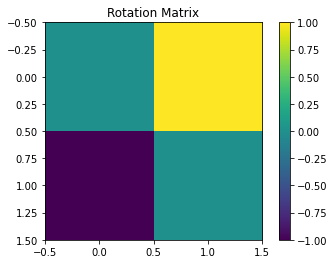

new_x, new_y: 
0 0
h: 2 w: 2
pixels: 1
------------------------ 
resultant matrix:  [[1 0]
 [0 0]]


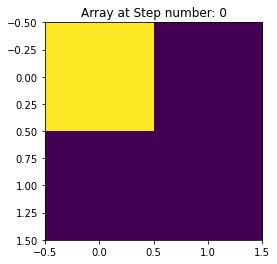

new_x, new_y: 
1 0
h: 2 w: 2
pixels: 3
------------------------ 
resultant matrix:  [[1 3]
 [0 0]]


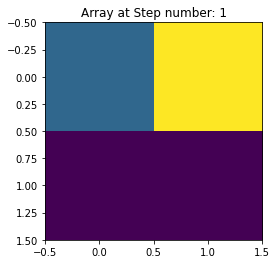

new_x, new_y: 
0 -1
h: 2 w: 2
pixels: 2
------------------------ 
resultant matrix:  [[1 3]
 [2 0]]


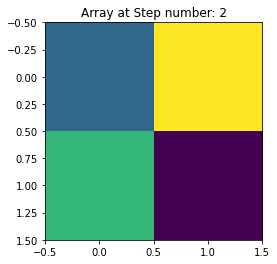

new_x, new_y: 
1 -1
h: 2 w: 2
pixels: 4
------------------------ 
resultant matrix:  [[1 3]
 [2 4]]


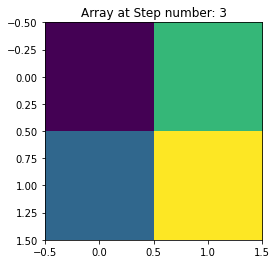

Final matrix:  [[1 3]
 [2 4]]


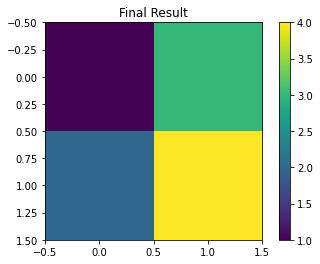

array([[1, 3],
       [2, 4]], dtype=uint8)

In [312]:

#rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 40, viz = 'YES')
rotate(array = a, angle_in_degrees = 90, viz = 'YES')

input array:  [[1 2]
 [3 4]]


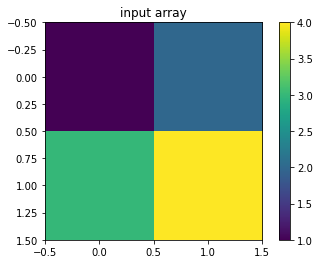

Rotation matrix:  [[-1.0, 0], [0, -1.0]]


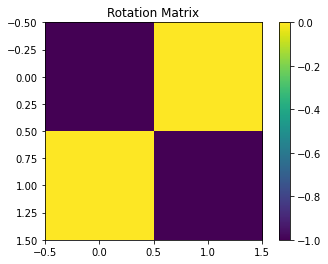

new_x, new_y: 
0 0
h: 2 w: 2
pixels: 1
------------------------ 
resultant matrix:  [[1 0]
 [0 0]]


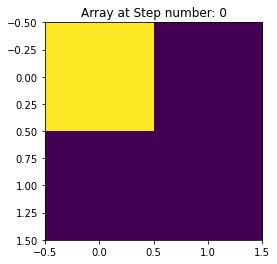

new_x, new_y: 
0 -1
h: 2 w: 2
pixels: 3
------------------------ 
resultant matrix:  [[1 0]
 [3 0]]


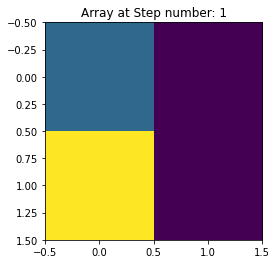

new_x, new_y: 
-1 0
h: 2 w: 2
pixels: 2
------------------------ 
resultant matrix:  [[1 2]
 [3 0]]


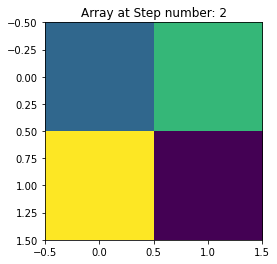

new_x, new_y: 
-1 -1
h: 2 w: 2
pixels: 4
------------------------ 
resultant matrix:  [[1 2]
 [3 4]]


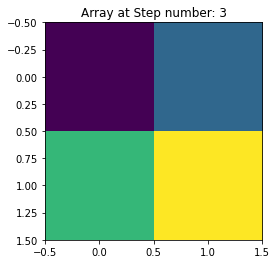

Final matrix:  [[1 2]
 [3 4]]


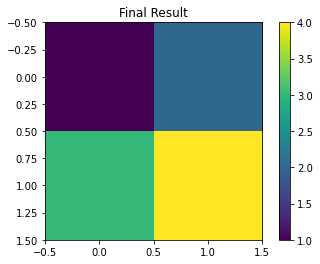

array([[1, 2],
       [3, 4]], dtype=uint8)

In [313]:

#rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 40, viz = 'YES')
rotate(array = a, angle_in_degrees = 180, viz = 'YES')

input array:  [[1 2]
 [3 4]]


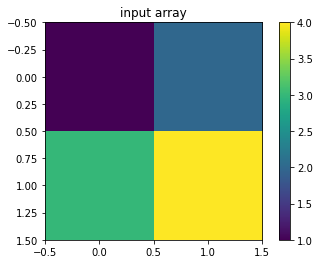

Rotation matrix:  [[0, -1.0], [1.0, 0]]


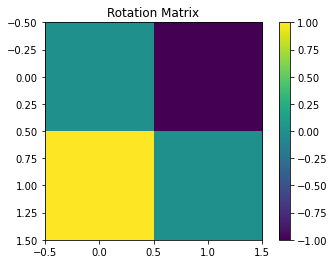

new_x, new_y: 
0 0
h: 2 w: 2
pixels: 1
------------------------ 
resultant matrix:  [[1 0]
 [0 0]]


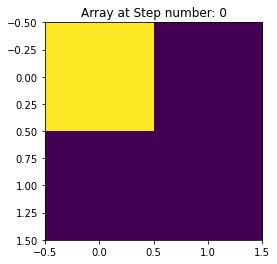

new_x, new_y: 
-1 0
h: 2 w: 2
pixels: 3
------------------------ 
resultant matrix:  [[1 3]
 [0 0]]


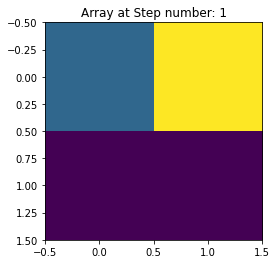

new_x, new_y: 
0 1
h: 2 w: 2
pixels: 2
------------------------ 
resultant matrix:  [[1 3]
 [2 0]]


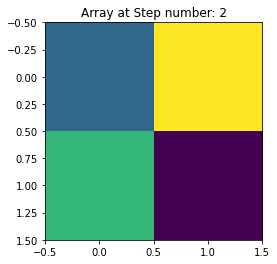

new_x, new_y: 
-1 1
h: 2 w: 2
pixels: 4
------------------------ 
resultant matrix:  [[1 3]
 [2 4]]


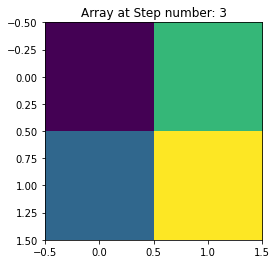

Final matrix:  [[1 3]
 [2 4]]


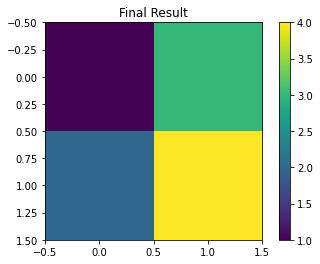

array([[1, 3],
       [2, 4]], dtype=uint8)

In [316]:

#rotate(array = np.array([[1, 2], [3, 4]]), angle_in_degrees = 40, viz = 'YES')
rotate(array = a, angle_in_degrees = 270, viz = 'YES')

In [315]:
array = np.array([[1, 2], [3, 4] ])
angle_in_degrees = 270